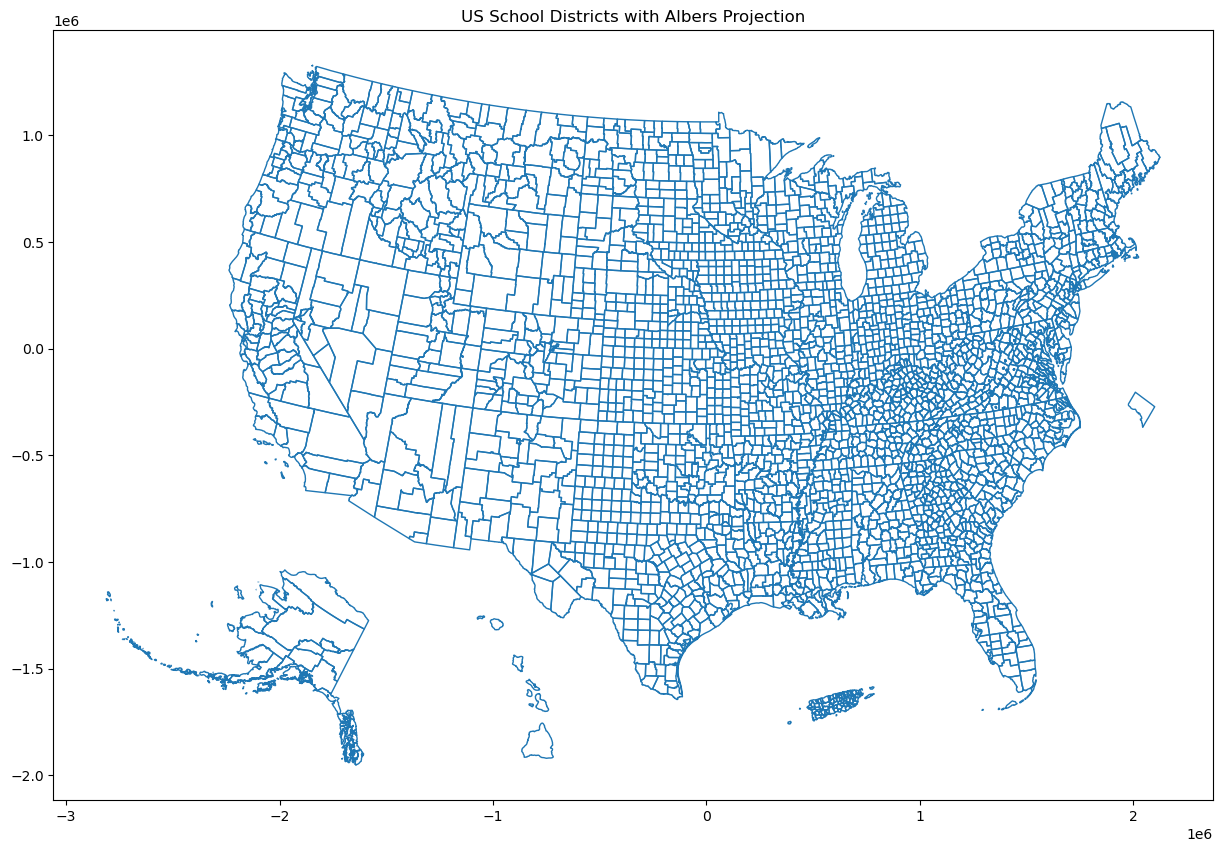

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.affinity import translate, scale

# Read the shapefile
shapefile_path = r'C:\Users\Sydney.Leiher\source\repos\District-shapefile-projection-shift\Counties\cb_2018_us_county_5m.shp'
gdf = gpd.read_file(shapefile_path)

# Albers Equal Area projection
albers_proj = "ESRI:102008"
gdf = gdf.to_crs(albers_proj)

# Remove territories
regions_to_remove = ['60', '64', '66', '68', '69', '70', '74', '78']
gdf = gdf[~gdf['STATEFP'].isin(regions_to_remove)]

# Define transformations for Alaska and Hawaii, Puerto Rico and DC
def transform_alaska(geometry):
    # Translate and scale Alaska 
    return scale(translate(geometry, xoff=-2000000, yoff=-7000000), xfact=0.4, yfact=0.4, origin=(0, 0))

def transform_hawaii(geometry):
    # Translate and scale Hawaii 
    return scale(translate(geometry, xoff=5200000, yoff=-1100000), xfact=1.2, yfact=1.2, origin=(0, 0))

def transform_puerto_rico(geometry):
    # Translate and scale Puerto Rico 
    return scale(translate(geometry, xoff=-2700000, yoff=900000), xfact=1.5, yfact=1.5, origin=(0, 0))

def transform_dc(geometry):
    # Translate and scale D.C. 
    return scale(translate(geometry, xoff=-1250000, yoff=-65000), xfact=7, yfact=7, origin=(0, 0))

# Apply transformations
gdf.loc[gdf['STATEFP'] == '02', 'geometry'] = gdf.loc[gdf['STATEFP'] == '02', 'geometry'].apply(transform_alaska)
gdf.loc[gdf['STATEFP'] == '15', 'geometry'] = gdf.loc[gdf['STATEFP'] == '15', 'geometry'].apply(transform_hawaii)
gdf.loc[gdf['STATEFP'] == '72', 'geometry'] = gdf.loc[gdf['STATEFP'] == '72', 'geometry'].apply(transform_puerto_rico)
gdf.loc[gdf['STATEFP'] == '11', 'geometry'] = gdf.loc[gdf['STATEFP'] == '11', 'geometry'].apply(transform_dc)


# Mapping of state FIPS codes to abbreviations
state_fips_to_abv = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
    '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA',
    '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM',
    '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY', '72': 'PR'
}

# Add state abbreviation column
gdf['ABV'] = gdf['STATEFP'].map(state_fips_to_abv)

# Add a new column combining STATEFP and COUNTYFP
gdf['COUNTYCD'] = gdf['STATEFP'] + gdf['COUNTYFP']

# Remove specified columns
#columns_to_remove = ['ELSDLEA', 'SCSDLEA', 'UNSDLEA', 'SDADMLEA']
#gdf = gdf.drop(columns=columns_to_remove)

# Filter out rows that contain 'Supervisory' in the NAME column
#filtered_gdf = gdf[~gdf['NAME'].str.contains('Supervisory')]

# lets test
fig, ax = plt.subplots(figsize=(15, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
plt.title('US School Districts with Albers Projection')
plt.show()


In [7]:
# Save shapefile
output_shapefile_path = r'C:\Users\Sydney.Leiher\source\repos\District-shapefile-projection-shift\Counties\Counties_Albers.shp'
gdf.to_file(output_shapefile_path)


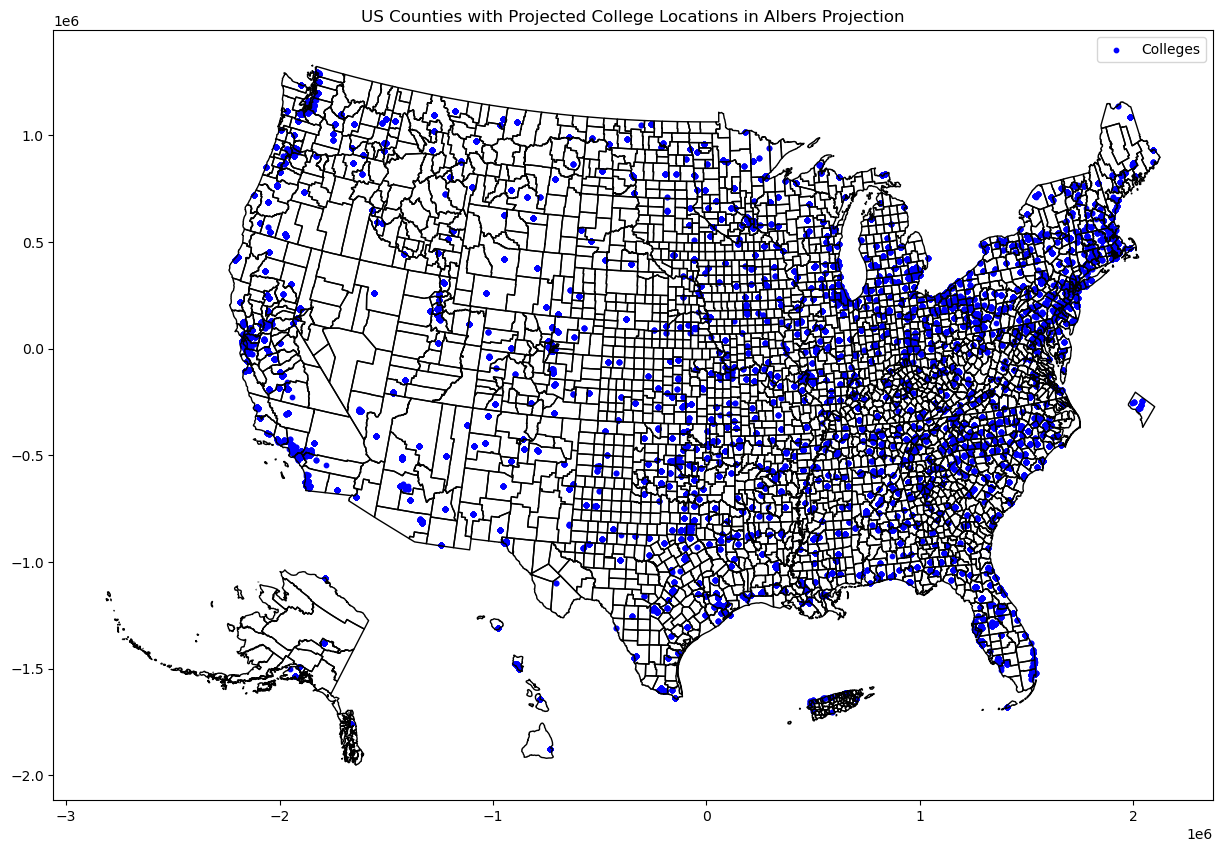

In [8]:
#Shift lat and log of colleges in Alaska and Hawaii

# Load ccpd
college_data_path = r'C:\Users\Sydney.Leiher\OneDrive - U.S. Department of Education\Analytics Projects\VIZ Projects\OCE Investments Map\Raw Data\ccpd_draft - addt columns.xlsx'  # Replace with your file path
df_colleges = pd.read_excel(college_data_path)

# Convert to Geo df
geometry = [Point(xy) for xy in zip(df_colleges['inst_lon'], df_colleges['inst_lat'])]
gdf_colleges = gpd.GeoDataFrame(df_colleges, geometry=geometry, crs="EPSG:4326")

# Project to Albers Equal Area projection
albers_proj = "ESRI:102008"
gdf_colleges = gdf_colleges.to_crs(albers_proj)

# Remove territories
regions_to_remove = ['GU', 'VI', 'AS', 'MP']
gdf_colleges = gdf_colleges[~gdf_colleges['stabbr'].isin(regions_to_remove)]

# Define transformations for Alaska, Hawaii, PR, and DC
def transform_alaska(geometry):
    return scale(translate(geometry, xoff=-2000000, yoff=-7000000), xfact=0.4, yfact=0.4, origin=(0, 0))

def transform_hawaii(geometry):
    return scale(translate(geometry, xoff=5200000, yoff=-1100000), xfact=1.2, yfact=1.2, origin=(0, 0))

def transform_pr(geometry):
        return scale(translate(geometry, xoff=-2700000, yoff=900000), xfact=1.5, yfact=1.5, origin=(0, 0))

def transform_dc(geometry):
    return scale(translate(geometry, xoff=-1250000, yoff=-65000), xfact=7, yfact=7, origin=(0, 0))

# Apply transformations to Alaska, Hawaii, PR, DC
gdf_colleges.loc[gdf_colleges['stabbr'] == 'AK', 'geometry'] = gdf_colleges.loc[gdf_colleges['stabbr'] == 'AK', 'geometry'].apply(transform_alaska)
gdf_colleges.loc[gdf_colleges['stabbr'] == 'HI', 'geometry'] = gdf_colleges.loc[gdf_colleges['stabbr'] == 'HI', 'geometry'].apply(transform_hawaii)
gdf_colleges.loc[gdf_colleges['stabbr'] == 'PR', 'geometry'] = gdf_colleges.loc[gdf_colleges['stabbr'] == 'PR', 'geometry'].apply(transform_pr)
gdf_colleges.loc[gdf_colleges['stabbr'] == 'DC', 'geometry'] = gdf_colleges.loc[gdf_colleges['stabbr'] == 'DC', 'geometry'].apply(transform_dc)

# Convert the 'countycd' column to string
gdf_colleges['countycd'] = gdf_colleges['countycd'].astype(str)

import matplotlib.pyplot as plt

#test

fig, ax = plt.subplots(figsize=(15, 10))
gdf.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot the counties
gdf_colleges.plot(ax=ax, color='blue', markersize=10, label="Colleges")  # Plot the colleges
plt.title("US Counties with Projected College Locations in Albers Projection")
plt.legend()
plt.show()


In [9]:
# Save shapefile
output_shapefile_path = r'C:\Users\Sydney.Leiher\source\repos\District-shapefile-projection-shift\Counties_Schools_Albers.shp'
gdf_colleges.to_file(output_shapefile_path)

C:\Users\Sydney.Leiher\AppData\Local\Temp\ipykernel_23484\169075879.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_colleges.to_file(output_shapefile_path)


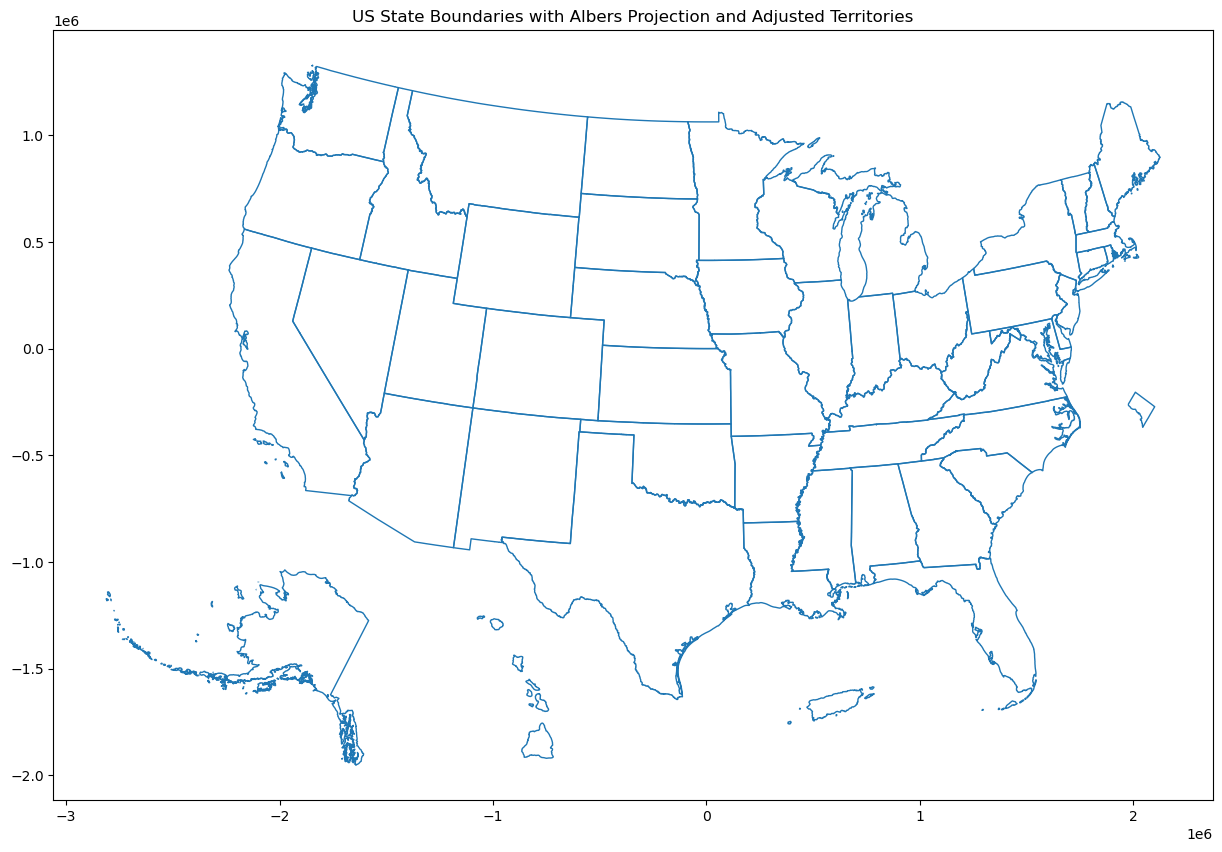

In [57]:
# Read the shapefile to make a US top level map
shapefile_path = r'C:\Users\Sydney.Leiher\source\repos\District-shapefile-projection-shift\Counties\cb_2018_us_county_5m.shp'
gdf = gpd.read_file(shapefile_path)

# Albers Equal Area projection
albers_proj = "ESRI:102008"
gdf = gdf.to_crs(albers_proj)

# Remove territories
regions_to_remove = ['60', '64', '66', '68', '69', '70', '74', '78']
gdf = gdf[~gdf['STATEFP'].isin(regions_to_remove)]

# Dissolve counties to create state boundaries only
gdf = gdf.dissolve(by='STATEFP')

# Define transformations for Alaska, Hawaii, Puerto Rico, and D.C.
def transform_alaska(geometry):
    return scale(translate(geometry, xoff=-2000000, yoff=-7000000), xfact=0.4, yfact=0.4, origin=(0, 0))

def transform_hawaii(geometry):
    return scale(translate(geometry, xoff=5200000, yoff=-1100000), xfact=1.2, yfact=1.2, origin=(0, 0))

def transform_puerto_rico(geometry):
    return scale(translate(geometry, xoff=-2700000, yoff=900000), xfact=1.5, yfact=1.5, origin=(0, 0))

def transform_dc(geometry):
    return scale(translate(geometry, xoff=-1250000, yoff=-65000), xfact=7, yfact=7, origin=(0, 0))

# Apply transformations
gdf.loc[gdf.index == '02', 'geometry'] = gdf.loc[gdf.index == '02', 'geometry'].apply(transform_alaska)
gdf.loc[gdf.index == '15', 'geometry'] = gdf.loc[gdf.index == '15', 'geometry'].apply(transform_hawaii)
gdf.loc[gdf.index == '72', 'geometry'] = gdf.loc[gdf.index == '72', 'geometry'].apply(transform_puerto_rico)
gdf.loc[gdf.index == '11', 'geometry'] = gdf.loc[gdf.index == '11', 'geometry'].apply(transform_dc)

# Mapping of state FIPS codes to abbreviations
state_fips_to_abv = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
    '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA',
    '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM',
    '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY', '72': 'PR'
}

# Add state abbreviation column after dissolve
gdf['ABV'] = gdf.index.map(state_fips_to_abv)

# Plot to test
fig, ax = plt.subplots(figsize=(15, 10))
gdf.boundary.plot(ax=ax, linewidth=1)
plt.title('US State Boundaries with Albers Projection and Adjusted Territories')
plt.show()


In [59]:
# Save state layer
output_shapefile_path = r'C:\Users\Sydney.Leiher\source\repos\District-shapefile-projection-shift\State_Layer.shp'
gdf.to_file(output_shapefile_path)

In [ ]:
sorted_filtered_gdf.head()

In [ ]:
sorted_filtered_gdf1 = sorted_filtered_gdf[sorted_filtered_gdf['ABV'] == 'VT']
sorted_filtered_gdf2 = sorted_filtered_gdf1.sort_values(by='NAME')
sorted_filtered_gdf2.head()
